# Introduction
This challenge is the capstone project of the Summer Analytics, a primer course on Data Science, conducted by Consulting and Analytics Club of IIT Guwahati in the summers.

The dataset is provided by DeltaX is the pioneering cross-channel digital advertising platform. The cloud-based platform leverages big data, user behavior, and machine learning algorithms to improve performance across the business funnel of advertisers.

### Problem Statement
Let's take a case where an advertiser on the platform (DeltaX) would like to estimate the performance of their campaign in the future.

Imagine it is the first day of March and you are given the past performance data of ads between 1st August to 28th Feb. You are now tasked to predict an ad's future performance (revenue) between March 1st and March 15th. Well, it is now time for you to put on your problem-solving hats and start playing with the data provided under the "data" section.


# Loading Libraries

In [3]:
pip install pydotplus


  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=0215bce312fc2a268ba695b33d40026aa863ee61e4611e5158000c2c596cdc2d
  Stored in directory: c:\users\vikrant_rao\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [27]:
# Importing Basic libraries to play with data and to construct EDA 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Libraries to make a Model for the data
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# For plotting the regression tree
from IPython.display import Image
import pydotplus

# To remove warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Reading Data



In [28]:
data_train = pd.read_csv(r'C:\Users\vikrant_rao\Downloads\Summer Analytics\Capstone Project\Train_Data.csv')
data_train.head(40)

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71
5,01-08-2020,campaign 1,adgroup 2,ad 2,7,2,0.04,0,0.00
6,01-08-2020,campaign 1,adgroup 4,ad 2,6,3,0.05,0,0.00
7,01-08-2020,campaign 1,adgroup 1,ad 3,129,52,0.58,0,0.00
8,01-08-2020,campaign 1,adgroup 3,ad 3,104,56,0.56,0,0.00
9,01-08-2020,campaign 1,adgroup 4,ad 3,6,5,0.05,0,0.00


In [29]:
data_test = pd.read_csv(r'C:\Users\vikrant_rao\Downloads\Summer Analytics\Capstone Project\Test_Data.csv')
data_test.head(20)

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0
5,01-03-2021,campaign 1,adgroup 4,ad 2,0.03,4,2,0
6,01-03-2021,campaign 1,adgroup 1,ad 2,1.67,276,123,1
7,01-03-2021,campaign 1,adgroup 2,ad 3,0.00,6,0,0
8,01-03-2021,campaign 1,adgroup 3,ad 3,1.06,162,74,1
9,01-03-2021,campaign 1,adgroup 4,ad 3,0.08,6,5,0


# Data Description
- date: the date on which the ad was made live
- campaign: campaign number
- adgroup: adgroup number
- ad: ad number
- impressions - Number of time the ad was shown
- clicks - Number of time the ad clicked shown
- cost - Amount spent to show ad
- conversions - Number of transactions received
- revenue: revenue generated from the ad

Our goal is to predict the revenue from Test data with a low RMSE score.

# File structure and content

In [30]:
data_train.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71


In [31]:
data_test.head()

,date,campaign,adgroup,ad,cost,impressions,clicks,conversions
0,01-03-2021,campaign 1,adgroup 1,ad 1,0.58,121,49,1
1,01-03-2021,campaign 1,adgroup 3,ad 1,0.17,22,12,0
2,01-03-2021,campaign 1,adgroup 4,ad 1,0.05,5,3,0
3,01-03-2021,campaign 1,adgroup 2,ad 1,0.01,2,1,0
4,01-03-2021,campaign 1,adgroup 2,ad 2,0.01,3,1,0


In [32]:
print("Row: ", data_train.shape[0])
print("Col: ", data_train.shape[1])

Row:  4571
Col:  9


In [33]:
print("Row: ", data_test.shape[0])
print("Col: ", data_test.shape[1])

Row:  318
Col:  8


In [34]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB


In [35]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         318 non-null    object 
 1   campaign     318 non-null    object 
 2   adgroup      318 non-null    object 
 3   ad           318 non-null    object 
 4   cost         318 non-null    float64
 5   impressions  318 non-null    int64  
 6   clicks       318 non-null    int64  
 7   conversions  318 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 20.0+ KB


Summary:
- The data_train data have 4571 rows and 9 columns.
- The data_test data have 318 rows and 8 columns.
- There are no missing data in both data_train and data_test.

# Exploratory Data Analysis(EDA)

In [36]:
data_train.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


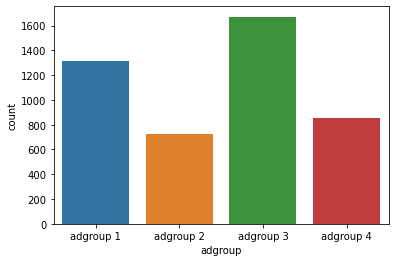

In [37]:
sns.countplot("adgroup", data = data_train);

There are 4 adgroups in adgroup column which will be converted into numerical variable by creating dummy variable.

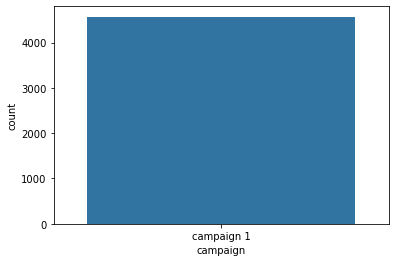

In [38]:
sns.countplot("campaign", data = data_train);

We can see that there is only 1 campaign. So taking campaign column into consideration is meaningless.

In [39]:
data_train["ad"].value_counts().sort_values()

ad 51      3
ad 47      4
ad 39      4
ad 69      4
ad 36      4
        ... 
ad 32    377
ad 7     461
ad 2     512
ad 1     587
ad 3     617
Name: ad, Length: 70, dtype: int64

We can see that there are 70 types of ads in ad column in data_train.

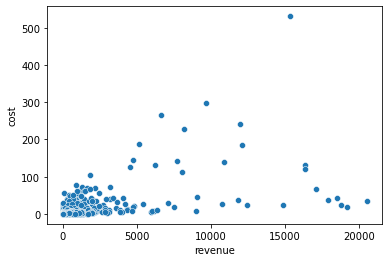

In [40]:
sns.scatterplot(x = data_train["revenue"], y = data_train["cost"]);

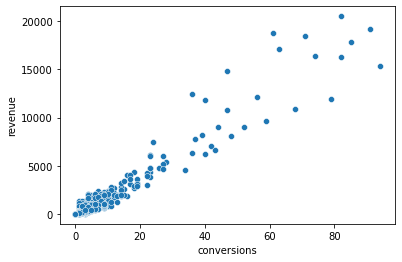

In [41]:
sns.scatterplot(x = "conversions", y = "revenue", data = data_train);

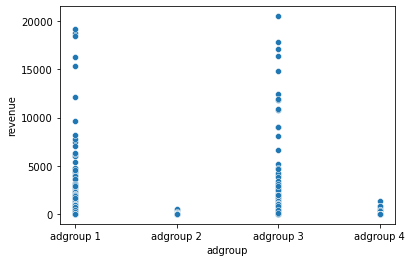

In [42]:
sns.scatterplot(x = "adgroup", y = "revenue", data = data_train);

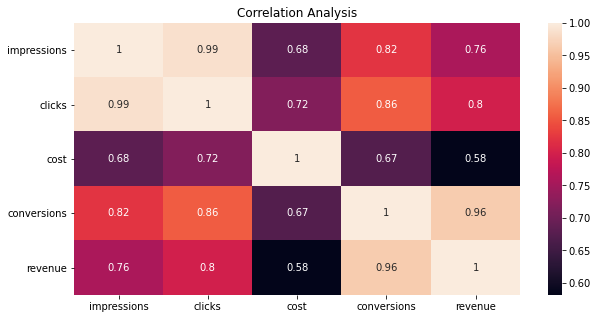

In [43]:
plt.figure(figsize=(10, 5))
plt.title("Correlation Analysis")
sns.heatmap(data_train.corr(), annot = True);

Note:
- The variable conversion is highly positively correlated to our target variable revenue.
- The cost is least positively correlated with revenue.
- There is only positive relationship between the variables in our dataset. 

# Adding Feature

In [44]:
def Add(x):
    x["CTR"] = x["clicks"] / x["impressions"]
    x["CPC"] = x["cost"] / x["clicks"]
    x["CPA"] = x["cost"] / x["conversions"]
    return x

Add(data_train)
Add(data_test)
data_train.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,0.250000,0.013333,inf
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,0.000000,NaN,NaN
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,0.307692,0.010000,inf
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,0.800000,0.020000,inf
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,0.510121,0.010238,0.3225


In [45]:
data_train = data_train.replace(np.inf, np.nan)
data_train = data_train.fillna(0)
data_test = data_test.replace(np.inf, np.nan)
data_test = data_test.fillna(0)


In [46]:
data_train.isnull().sum()

date           0
campaign       0
adgroup        0
ad             0
impressions    0
clicks         0
cost           0
conversions    0
revenue        0
CTR            0
CPC            0
CPA            0
dtype: int64

In [47]:
data_train.describe()

,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340,0.439934,0.059030,0.556686
std,198.349737,100.164913,14.361618,5.223922,1091.742763,0.232061,0.135018,2.011103
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000,0.333333,0.010610,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000,0.451389,0.015556,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000,0.533333,0.055000,0.220000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000,2.000000,3.810000,57.450000


# Treating Outliers

In [48]:
data_train.cost.sort_values(ascending = False)

2262    531.25
2273    297.96
2264    265.44
2272    241.70
2248    228.20
         ...  
2233      0.00
4132      0.00
1042      0.00
4135      0.00
3354      0.00
Name: cost, Length: 4571, dtype: float64

By using this, we found that there are outliers in Cost, impressions, clicks, CPC and CPA. So, we will treat it in the next line.

In [49]:
data_train.cost[(data_train.cost > 300)] = 300
data_train.impressions[(data_train.impressions > 2200)] = 2200
data_train.clicks[(data_train.clicks > 1200)] = 1200
data_train.CPC[(data_train.CPC > 2.5)] = 2.5
data_train.CPA[(data_train.CPA > 27)] = 27

In [50]:
data_train.describe()

,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.408445,43.215926,2.750243,1.339094,231.865340,0.439934,0.058744,0.550024
std,195.315435,98.349439,12.824752,5.223922,1091.742763,0.232061,0.128277,1.867945
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000,0.333333,0.010610,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000,0.451389,0.015556,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000,0.533333,0.055000,0.220000
max,2200.000000,1200.000000,300.000000,94.000000,20515.410000,2.000000,2.500000,27.000000


## For Training data

In [51]:
X_train = data_train.drop(["date", "revenue", "campaign", "ad"], axis = 1)
X_train = pd.get_dummies(X_train)
X_train.head()

,impressions,clicks,cost,conversions,CTR,CPC,CPA,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
0,24,6,0.08,0,0.250000,0.013333,0.0000,1,0,0,0
1,1,0,0.00,0,0.000000,0.000000,0.0000,0,1,0,0
2,13,4,0.04,0,0.307692,0.010000,0.0000,0,0,1,0
3,5,4,0.08,0,0.800000,0.020000,0.0000,0,0,0,1
4,247,126,1.29,4,0.510121,0.010238,0.3225,1,0,0,0


In [52]:
y_train = data_train["revenue"]
y_train.head()

0      0.00
1      0.00
2      0.00
3      0.00
4    925.71
Name: revenue, dtype: float64

## For Test data

In [53]:
X_test = data_test.drop(["date", "campaign", "ad"], axis = 1)
X_test = pd.get_dummies(X_test)
X_test.head()

,cost,impressions,clicks,conversions,CTR,CPC,CPA,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
0,0.58,121,49,1,0.404959,0.011837,0.58,1,0,0,0
1,0.17,22,12,0,0.545455,0.014167,0.00,0,0,1,0
2,0.05,5,3,0,0.600000,0.016667,0.00,0,0,0,1
3,0.01,2,1,0,0.500000,0.010000,0.00,0,1,0,0
4,0.01,3,1,0,0.333333,0.010000,0.00,0,1,0,0


# Regression Tree

In [54]:
# Got the best value for the parameters by using Grid Search CV
regtree = tree.DecisionTreeRegressor(criterion = "mse", max_depth = 6, max_features = "auto", min_samples_split = 2, splitter = "best", random_state = 0)

In [55]:
regtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, max_features='auto', random_state=0)

In [56]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [57]:
print("RMSE score for Training data: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))

RMSE score for Training data:  138.5800188426886


In [58]:

print("R2 score for Training data: ", r2_score(y_train, y_train_pred))

R2 score for Training data:  0.9838840611930215


In [59]:
res = pd.DataFrame(y_test_pred) 
res.index = X_test.index 
res.columns = ["revenue"]
res.to_csv("prediction_results.csv", index = False)       # creating a csv file for the prediction data

In [60]:
res.describe()

,revenue
count,318.000000
mean,116.356714
std,247.941998
min,0.000000
25%,0.000000
50%,0.000000
75%,141.440425
max,1996.076000


In [61]:
res.head()

,revenue
0,141.440425
1,0.000000
2,0.000000
3,0.000000
4,0.000000


The RMSE score for our Testing data is around 137.89 which is very near to our training model RMSE score 138.58, which shows that the model is good for predicting revenue.

# Creating Image for Regression Tree 

In [62]:
dot_data = tree.export_graphviz(regtree, out_file = None, feature_names = X_test.columns, filled = True)

In [63]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Grid Search CV

In [ ]:
params_grid = {"min_samples_split": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               "max_depth": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               "max_features": ["auto", "sqrt", "log2"],
               "criterion": ["mse", "friedman_mse", "mae"]}

In [ ]:
grid_search = GridSearchCV(regtree, params_grid, n_jobs = -1, cv = 5)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_params_

The above are the best parameters for our regression tree model

In [64]:
curf_clf = grid_search.best_estimator_
print("R2 sccore of Training data: ", r2_score(y_train, curf_clf.predict(X_train)))

NameError: name 'grid_search' is not defined

In [65]:
print("RMSE of Training Data: ", np.sqrt(mean_squared_error(y_train, curf_clf.predict(X_train))))

NameError: name 'curf_clf' is not defined